In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import random

In [2]:
random.seed(1)

In [3]:
def Exp_and_Var(x,X,t,sigma,m):
    pdf_vals = norm.pdf(x - X.reshape(m,1), loc = 0, scale = sigma).T
    pdf_vals = pdf_vals/(pdf_vals.sum(axis = 1,keepdims=True))
    Expectation = (pdf_vals * t.reshape(1,m)).sum(axis = 1)
    Conditional_Var = np.sqrt(sigma **2 +  (pdf_vals * t.reshape(1,m) **2).sum(axis = 1) - Expectation **2)
    return Expectation, Conditional_Var

In [4]:
m=10
x = np.linspace(0,1,m)
t = np.sin(2*(np.pi)*x)
y = np.sin(2*(np.pi)*x) + np.random.normal(scale=0.1, size=[x.shape[0]])

In [5]:
print(x)
print(t)
print(y)

[0.         0.11111111 0.22222222 0.33333333 0.44444444 0.55555556
 0.66666667 0.77777778 0.88888889 1.        ]
[ 0.00000000e+00  6.42787610e-01  9.84807753e-01  8.66025404e-01
  3.42020143e-01 -3.42020143e-01 -8.66025404e-01 -9.84807753e-01
 -6.42787610e-01 -2.44929360e-16]
[ 0.20200999  0.61655359  1.01602904  0.8359874   0.43133486 -0.41343892
 -0.94932337 -0.88235159 -0.47064823 -0.19116344]


Text(0.5, 1.0, 'Original data point')

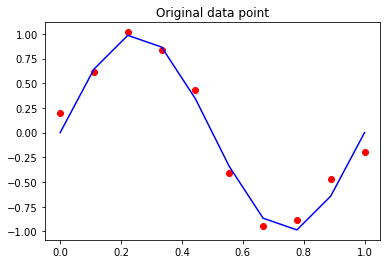

In [9]:
x0 = np.ones(m)
phi = np.dstack((x0,x))
plt.scatter(x, y, color='red')
plt.plot(x, t, color='blue')
plt.title('Original data point')

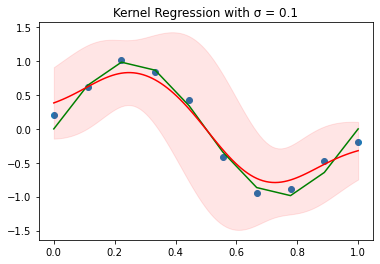

In [20]:
x_test = np.linspace(0,1,100)
sigma = 0.1
E,V = Exp_and_Var(x_test,x,y,sigma,m)
plt.scatter(x, y)
plt.plot(x, t, color='green')
plt.plot(x_test,E,color='red')
plt.fill_between(x_test,E - 2*V, E + 2*V, alpha = 0.1, color='red')
plt.title('Kernel Regression with σ = 0.1')
plt.savefig('kernel_regression.jpg')